## Задание 1 

In [ ]:
# Импортируйте библиотеки pandas, numpy и matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fivethirtyeight')

In [2]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
# Создайте датафреймы X и y из этих данных

In [5]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
Y = pd.DataFrame(boston['target'], columns=['price'])

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split 
# так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# Масштабируйте данные с помощью StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [16]:
# Постройте диаграмму рассеяния на этих данных

In [19]:
X_train_scaled_tsne = tsne.fit_transform(X_train_scaled)

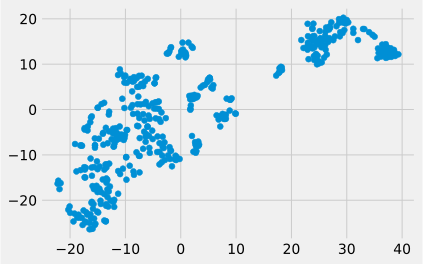

In [18]:
plt.scatter(X_train_scaled_tsne[:, 0], X_train_scaled_tsne[:, 1])
plt.show()

## Задание 2 

In [20]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [22]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, 
# и раскрасьте точки из разных кластеров разными цветами

In [23]:
kmeans.fit(X_train_scaled)

KMeans(max_iter=100, n_clusters=3, random_state=42)

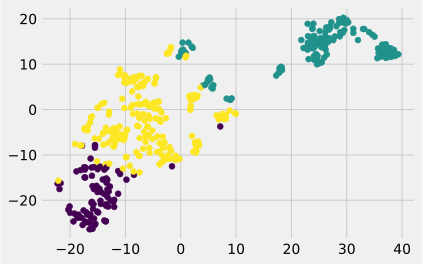

In [24]:
train_labels = kmeans.labels_
plt.scatter(X_train_scaled_tsne[:, 0], X_train_scaled_tsne[:, 1], c=train_labels)
plt.show()

In [25]:
# Вычислите средние значения price и CRIM в разных кластерах

In [26]:
train_clusters = pd.DataFrame({'cluster':kmeans.labels_, 'price': Y_train.price.values, 'CRIM': X_train.CRIM.values})
train_clusters.groupby('cluster')['price', 'CRIM'].mean()

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_11084/1595877262.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train_clusters.groupby('cluster')['price', 'CRIM'].mean()


,price,CRIM
cluster,,
0,27.788372,0.073566
1,16.165354,10.797028
2,24.958115,0.421660


## Задание 3 

In [27]:
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных

In [28]:
test_labels = kmeans.predict(X_test_scaled)
test_clusters = pd.DataFrame({'cluster': test_labels, 'price': Y_test.price.values, 'CRIM': X_test.CRIM.values})
test_clusters.groupby('cluster')['price', 'CRIM'].mean()

C:\Users\73B5~1\AppData\Local\Temp/ipykernel_11084/1617473933.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  test_clusters.groupby('cluster')['price', 'CRIM'].mean()


,price,CRIM
cluster,,
0,31.350000,0.062060
1,16.437143,10.165531
2,21.860784,0.266079
